<a href="https://colab.research.google.com/github/JensCheung/PythonDA-course/blob/main/Assessment/Data_Analytics_with_Python_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This assessment aims to evaluate your understanding and application of the concepts covered in the Data Analytics course. You will be tasked with analyzing a dataset related to remote work and mental health, utilizing various data manipulation, statistical analysis, and visualization techniques learned throughout the course. This exercise will help reinforce your skills in data handling, exploratory analysis, and drawing meaningful insights from data.

### Submission Details:

The deadline for submission is 16 November at 11:59 PM. Specific submission details will be shared with you shortly.

### Passing Criteria:

To successfully pass this assessment, you must achieve a score of 80% or higher.
We encourage you to engage with the material and demonstrate your analytical skills. Good luck!


---



# Section 1 - Beginner (25%)


## Shopping Cart System with Discounts

Write a Python program to simulate a shopping cart system for an online store. The program will calculate the total cost of items, apply discounts, and check if the total exceeds a specified budget.

1.	Variables and Lists:
  - Define a `budget` variable with an initial value of 200.
  
  - Create two empty lists called `item_names_list` and `item_prices_list` to store the name and price of each item separately.

In [1]:
# Write your code here
budget = 200
item_name_list = []
item_prices_list = []

2. Functions:
  - Write a function `add_item_to_cart(item_name, item_price)` that takes the item’s name and price as arguments, appends the name to item_names and the price to item_prices, and returns both updated lists.
  
  - Write a function `calculate_total(item_prices)` that calculates and returns the total cost of all items in item_prices.

    Conditions:
    - If the total cost exceeds the budget after adding an item, print "Budget exceeded!" and stop adding more items.
    - If the total cost is within budget and exceeds $100, apply a 10% discount on the total and print the discounted total.

In [24]:
# Write your code here
def add_item_to_cart(item_name, item_price):
  global budget
  total_cost = sum(item_prices_list) + item_price
  if total_cost > budget:  # if total cost is more than budget then it has been exceeded
      print("Budget exceeded!")
      return item_name_list, item_prices_list
  item_name_list.append(item_name) #add to the list
  item_prices_list.append(item_price)
  return item_name_list, item_prices_list

def calculate_total(item_prices):
  total_cost = sum(item_prices)
  if total_cost > 100:
      total_cost *= 0.9  # Apply 10% discount
      print(f"Discounted total: ${total_cost:.2f}")
  return total_cost


3.	Loop and Input:
  - Start the input only once the user says 'start'
  - Use a loop to allow the user to add items to the cart by entering an item name and price. The loop should stop when the user types 'done'.
  - For each item, add it to item_names and item_prices using add_item_to_cart, then update the total cost using calculate_total.

Output:
  - After the loop ends, display the final cart with each item and its price, the initial total, any applicable discount, and the final total.


In [28]:
# Write your code here
start_input = input("Type 'start' to begin adding items to the cart: ").strip().lower()
if start_input == 'start':
    while True:
        item_name = input("Enter item name (or type 'done' to finish): ").strip()
        if item_name.lower() == 'done':
            break
        item_price = float(input("Enter item price: ").strip())
        item_name_list, item_prices_list = add_item_to_cart(item_name, item_price)
        total = calculate_total(item_prices_list)
        print(f"Current total: ${total:.2f}")



Type 'start' to begin adding items to the cart: start
Enter item name (or type 'done' to finish): jere
Enter item price: 34
Budget exceeded!
Discounted total: $159.03
Current total: $159.03
Enter item name (or type 'done' to finish): done


In [29]:
# Write your code here
print("\nFinal Cart:")
for name, price in zip(item_name_list, item_prices_list):
    print(f"{name}: ${price:.2f}")

initial_total = sum(item_prices_list)
if initial_total > 100:
    final_total = initial_total * 0.9
    print(f"\nInitial total: ${initial_total:.2f}")
    print(f"Discount applied: 10%")
    print(f"Final total after discount: ${final_total:.2f}")
else:
    print(f"\nTotal cost: ${initial_total:.2f}")


Final Cart:
matt: $29.00
dan: $24.70
jens: $123.00

Initial total: $176.70
Discount applied: 10%
Final total after discount: $159.03


# Section 2 - Intermidiate (55%) - Remote Work and Mental Health Analysis

Dataset source: Kaggle (https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health)




## Objective:
- In the following sections, you will explore the "Remote Work and Mental Health" dataset using Python and different data science libraries such as Pandas, NumPy and Matplotlib.
- Follow the instructions below to complete each task. Please provide code for each question and any observations as comments when necessary.

In [30]:
# Import necessary modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Load Dataset (2 marks)
- Instructions: Load the dataset using Pandas and display few rows.
- Question: Describe the overall structure (rows, columns, data types) as a comment at the end of your code.


In [123]:
# Write code here
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
df.head(6)

Saving Impact_of_Remote_Work_on_Mental_Health.csv to Impact_of_Remote_Work_on_Mental_Health (5).csv


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America


## 2. Display 'n' Rows (3 marks)
- Instructions: Display the first 13 rows of the dataset.

In [34]:
# Write code here
df.head(13)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


- Instructions: Display the last 7 rows of the dataset

In [36]:
# Write code here
df.tail(7)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4993,EMP4994,35,Non-binary,Marketing,Retail,12,Hybrid,32,13,5,Medium,NaN,Yes,Decrease,2,Satisfied,3,Daily,Good,Asia
4994,EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia
4999,EMP5000,29,Male,HR,IT,30,Onsite,20,15,1,Low,Depression,Yes,No Change,3,Unsatisfied,5,NaN,Poor,Asia


## 3. Find the Number of Null Values in the Dataset (2 mark)

In [38]:
# Write code here
df.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


## 4. Statistical Summary for Numeric Columns (10 marks)
Instructions: Use individual commands to find the statistical summary.

- Count

In [39]:
# Write code here
df.count()


,0
Employee_ID,5000
Age,5000
Gender,5000
Job_Role,5000
Industry,5000
Years_of_Experience,5000
Work_Location,5000
Hours_Worked_Per_Week,5000
Number_of_Virtual_Meetings,5000
Work_Life_Balance_Rating,5000


- Mean

In [45]:
# Write code here
df.mean(numeric_only=True)

,0
Age,40.9950
Years_of_Experience,17.8102
Hours_Worked_Per_Week,39.6146
Number_of_Virtual_Meetings,7.5590
Work_Life_Balance_Rating,2.9842
Social_Isolation_Rating,2.9938
Company_Support_for_Remote_Work,3.0078


- Standard Deviation

In [47]:
# Write code here
df.std(numeric_only=True)

,0
Age,11.296021
Years_of_Experience,10.020412
Hours_Worked_Per_Week,11.860194
Number_of_Virtual_Meetings,4.636121
Work_Life_Balance_Rating,1.410513
Social_Isolation_Rating,1.394615
Company_Support_for_Remote_Work,1.399046


- Quartiles

In [52]:
# Write code here
df.quantile([0.25, 0.5, 0.75], numeric_only=True)


,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
0.25,31.0,9.0,29.0,4.0,2.0,2.0,2.0
0.50,41.0,18.0,40.0,8.0,3.0,3.0,3.0
0.75,51.0,26.0,50.0,12.0,4.0,4.0,4.0


## 5. Calculate Extrema (2 marks)

In [54]:
# Write code here
df.min(numeric_only= True)
df.max(numeric_only= True)


,0
Age,60
Years_of_Experience,35
Hours_Worked_Per_Week,60
Number_of_Virtual_Meetings,15
Work_Life_Balance_Rating,5
Social_Isolation_Rating,5
Company_Support_for_Remote_Work,5


## 6. Find Unique Values in a Categorical Column (3 marks)

- Instructions: Identify the unique values in the `job_role` column (2 marks)
- Question: How many unique roles are represented in the dataset? (1 mark)

In [64]:
len(df['Job_Role'].unique())
#there are 7 jobs

7

## 7. Group Data and Calculate Mean (4 marks)
- Instructions: Group the dataset by `job_role` and calculate the mean of the `Work_Life_Balance_Rating` for each role.
- Question: Which job role has the highest average Work life balance?

In [66]:
# Write code here
df.groupby('Job_Role')['Work_Life_Balance_Rating'].mean()
#sales has the highest averaage work life balance


,Work_Life_Balance_Rating
Job_Role,
Data Scientist,3.007184
Designer,2.966805
HR,2.930168
Marketing,2.945827
Project Manager,2.960705
Sales,3.043656
Software Engineer,3.033755


## 8. Filter Data Based on Condition (4 marks)
- Instructions: Filter the dataset to show only rows where `work_hours_per_week` is greater than 40.
- Question: How many employees are working overtime?

In [74]:
# Write code here
df['Hours_Worked_Per_Week'] = pd.to_numeric(df['Hours_Worked_Per_Week'], errors='coerce')
filtered_df = df[df['Hours_Worked_Per_Week'] > 40]

print(f"Number of employees working overtime: {len(filtered_df)}")
#number of employees is 2384

Number of employees working overtime: 2384


## 9 . Histogram of Work Hours per Week (5 marks)
- Instructions: Create a histogram of `Hours_Worked_Per_Week` (4 marks).
- Question: Describe the distribution of work hours. Are most employees working around a certain number of hours per week? (1 mark)

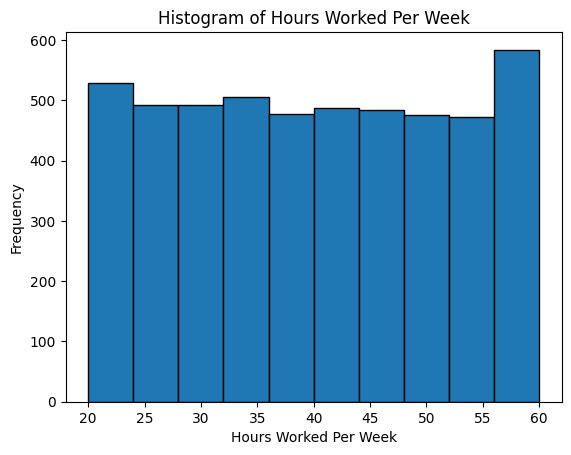

In [78]:
# Write code here
plt.hist(df['Hours_Worked_Per_Week'],edgecolor='black')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Frequency')
plt.title('Histogram of Hours Worked Per Week')
plt.show()
#The distribution is pretty equal until the 60 hour mark where there is a peak showing that there are a lot of employees who work exactly 60 hours


## 10. Scatter Plot of Work Hours vs. Years_of_Experience (4 marks)
- Instructions: Create a scatter plot with `Hours_Worked_Per_Week` on the x-axis and `Years_of_Experience` on the y-axis.

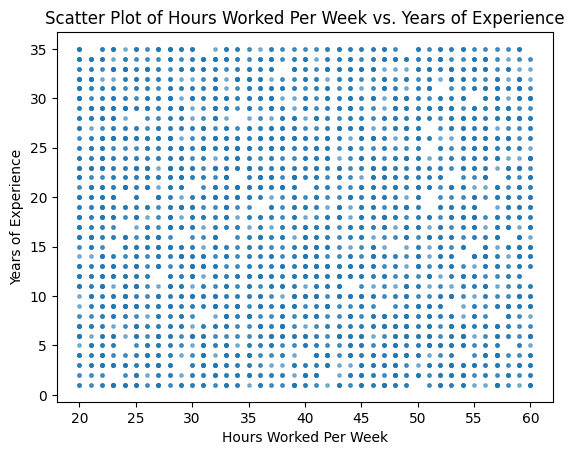

In [82]:
# Write code here
plt.scatter(df['Hours_Worked_Per_Week'], df['Years_of_Experience'], alpha=0.5,s = 6)
plt.title('Scatter Plot of Hours Worked Per Week vs. Years of Experience')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Years of Experience')
plt.show()


## 11. Bar Chart of Average Work Life Balance by Job Role (5 marks)
- Instructions: Create a bar chart showing the average `Work_Life_Balance_Rating` for each `Job_Role` (4 marks).
- Question: Which job roles have the highest and lowest average mental Work Life Balance? (1 mark)

Text(0.5, 1.0, 'Average Work Life Balance by Job Role')

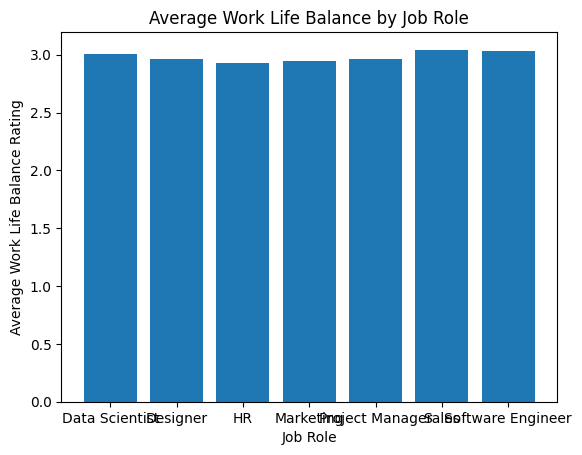

In [85]:
# Write code here
average_wlb_rating = df.groupby('Job_Role')['Work_Life_Balance_Rating'].mean()

plt.bar(average_wlb_rating.index, average_wlb_rating.values)
plt.xlabel('Job Role')
plt.ylabel('Average Work Life Balance Rating')
plt.title('Average Work Life Balance by Job Role')

#sales has the highes and HR the lowest

## 12. Pie Chart of Workload Level Distribution (5 marks)
- Instructions: Use a pie chart to show the proportion of `Access_to_Mental_Health_Resources` (Yes and no) in the dataset (4 marks).
- Question: What percentage of employees have access to mental health resources? (1 mark)

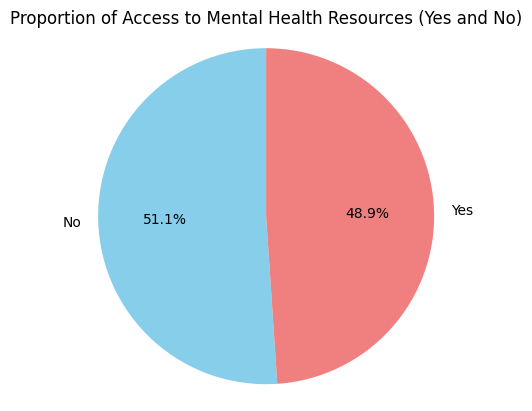

In [86]:
# Write code here
access_counts = df['Access_to_Mental_Health_Resources'].value_counts()

plt.pie(access_counts, labels=access_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Access to Mental Health Resources (Yes and No)')
plt.axis('equal')  #equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#the percentage is 48.9


## 13. Scatter Plot of Age vs. Social Isolation Rating (6 marks)
- Instructions: Create a scatter plot with `age` on the x-axis and `Social_Isolation_Rating` on the y-axis (4 marks).
- Question: Do you observe any trends or relationships between age and social isolation? Is there a noticeable impact of age on isoloation? (2 marks)

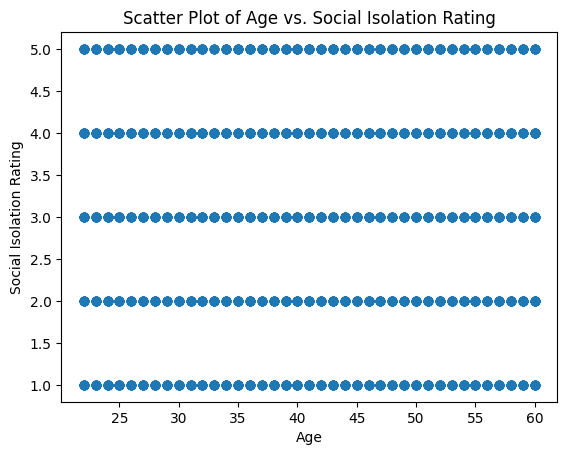

In [90]:
# Write code here
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Social_Isolation_Rating'] = pd.to_numeric(df['Social_Isolation_Rating'], errors='coerce')

plt.scatter(df['Age'], df['Social_Isolation_Rating'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Social Isolation Rating')
plt.xlabel('Age')
plt.ylabel('Social Isolation Rating')
plt.show()

#social isolation rating does not change as age increments

# Section 3 - Long Answer/Advanced (20%)



## Job Role and Workload Level Impact on Mental Health

Instructions: Investigate the influence of job roles and workload level on the mental health.
- Create a new column `workload_level` that labels each entry as "High" if the `Hours_Worked_Per_Week` is above its mean, otherwise "Low." (5 marks)
- Group the dataset by `Industry` and calculate the average `Hours_Worked_Per_Week` for each combination. (5 marks)
- Use a bar chart to display the average `Stress_Level` for each job role, with separate bars for high and low stress levels. (5 marks)
- Analyze the results: Which job roles and workload levels appear to have the greatest impact on mental health? (5 marks)


In [124]:
# Write code here
# Convert 'work_hours_per_week' column to numeric
df['Hours_Worked_Per_Week'] = pd.to_numeric(df['Hours_Worked_Per_Week'], errors='coerce')

# Calculate the mean of 'work_hours_per_week'
mean_hours_worked = df['Hours_Worked_Per_Week'].mean()

# Create a new column 'workload_level'
df['workload_level'] = df['Hours_Worked_Per_Week'].apply(lambda x: 'High' if x > mean_hours_worked else 'Low')

# Display the first few rows of the updated dataset
print(df.head())

  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating  ...  \
0                           7                         2  ...   
1                           4                         1  ...   
2                          11         

In [97]:
average_hours_by_industry = df.groupby('Industry')['Hours_Worked_Per_Week'].mean()

print("Average Hours Worked Per Week by Industry:")
print(average_hours_by_industry)

Average Hours Worked Per Week by Industry:
Industry
Consulting       39.205882
Education        39.428986
Finance          39.192771
Healthcare       40.067308
IT               40.017426
Manufacturing    40.241581
Retail           39.150138
Name: Hours_Worked_Per_Week, dtype: float64


Industry
Consulting       39.205882
Education        39.428986
Finance          39.192771
Healthcare       40.067308
IT               40.017426
Manufacturing    40.241581
Retail           39.150138
Name: Hours_Worked_Per_Week, dtype: float64


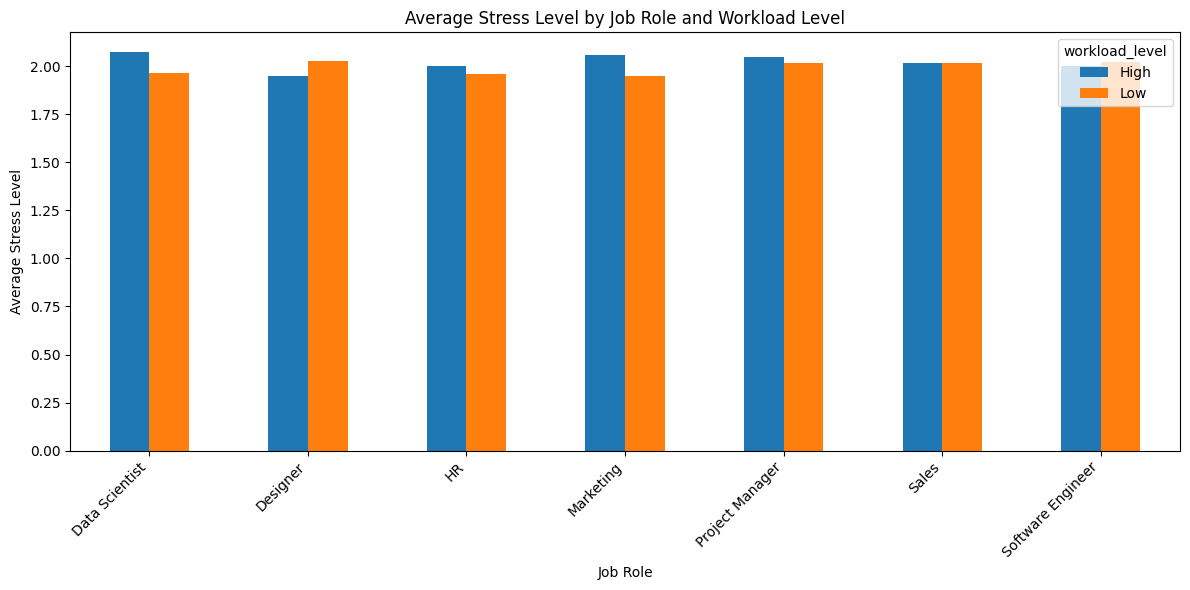

In [125]:

mean_hours = df['Hours_Worked_Per_Week'].mean()

#new column for workload level if more than mean high else low
df['workload_level'] = np.where(df['Hours_Worked_Per_Week'] > mean_hours, 'High', 'Low')

#group industry and calculate the average 'Hours_Worked_Per_Week'
industry_avg_hours = df.groupby('Industry')['Hours_Worked_Per_Week'].mean()

# Display the results
print(industry_avg_hours)
stress_level = {'Low': 1, 'Medium': 2, 'High': 3}
df['Stress_Level'] = df['Stress_Level'].map(stress_level)

#clculate the average of stress
grouped_data = df.groupby(['Job_Role', 'workload_level'])['Stress_Level'].mean().reset_index()

#plot the chart
grouped_data.pivot(index='Job_Role', columns='workload_level', values='Stress_Level').plot(kind='bar', figsize=(12, 6))

plt.xlabel('Job Role')
plt.ylabel('Average Stress Level')
plt.title('Average Stress Level by Job Role and Workload Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Which job roles and workload levels appear to have the greatest impact on mental health?
'''
  in 2 cases a high workload level led to lower stress level,
  1 case where it did not affect the stress level and 4 cases
  where the higher workload led to higher stress levels overall it can be seen that
  a higher workload tend to lead to a higher stress level showing a positive corelation between
  the two elements.
  Data scientist, Marketing and Project manager have the highest peaks in terms of stress level and the hypothesis
  that their role is the most stressful is plaussible
  Overall, it should be noted that correlation is not equal to causation but that those roles and workload
  level contribute to stress level
'''